# Examples of XAFS data analysis with Larch

First read in some data 

In [17]:
import numpy as np
from larch.io import read_ascii
feo = read_ascii('./larch_data/feo_xafs.dat', labels = 'energy ctime i0 i1 nothing')
feo.mu = - np.log(feo.i1/feo.i0)

Normalization and backgroud removal (= EXAFS extraction)

In [18]:
from larch.xafs import autobk
autobk(feo, kweight=2, rbkg=0.8, e0=7119.0)

Fourier transform

In [19]:
from larch.xafs import xftf
xftf(feo, kweight=2, kmin=2, kmax=13.0, dk=5, kwindow='Kaiser-Bessel')

Basic plots can be done directly with matplotlib. The command `%matplotlib inline` permits in-line plots, that is, images are saved in the notebook. This means that the figures are visible when the notebook is open, even without execution.

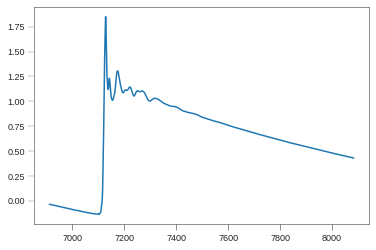

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(feo.energy, feo.mu)

Text(0, 0.5, '$k^{2}\\chi(k) \\rm\\,(\\AA^{-2})$')

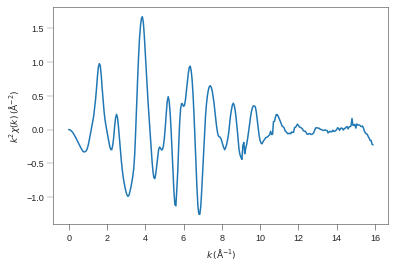

In [21]:
from larch.wxlib import plotlabels as plab
plt.plot(feo.k, feo.chi*feo.k**2)
plt.xlabel(plab.k)
plt.ylabel(plab.chikw.format(2))

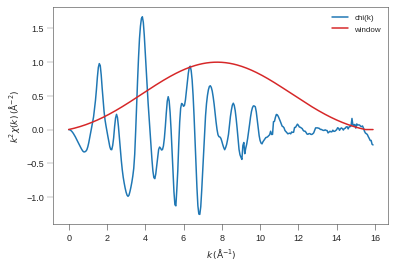

In [22]:
plt.plot(feo.k, feo.chi*feo.k**2, label='chi(k)')
plt.plot(feo.k, feo.kwin, label='window')
plt.xlabel(plab.k)
plt.ylabel(plab.chikw.format(2))
plt.legend()

A work-in-progress utility is available in `sloth.utils.xafsplotter`. It is simply a wrapper on top of the wonderful `plt.subplots()`. The goal of this utility is to produce *in-line* nice figures with standard layouts ready for reporting your analysis to colleagues. With little effort/customization, those plots could be converted to publication quality figures...

Currently (September 2019), not much is available. To show the idea behind, previous plots are condensed in a single figure.

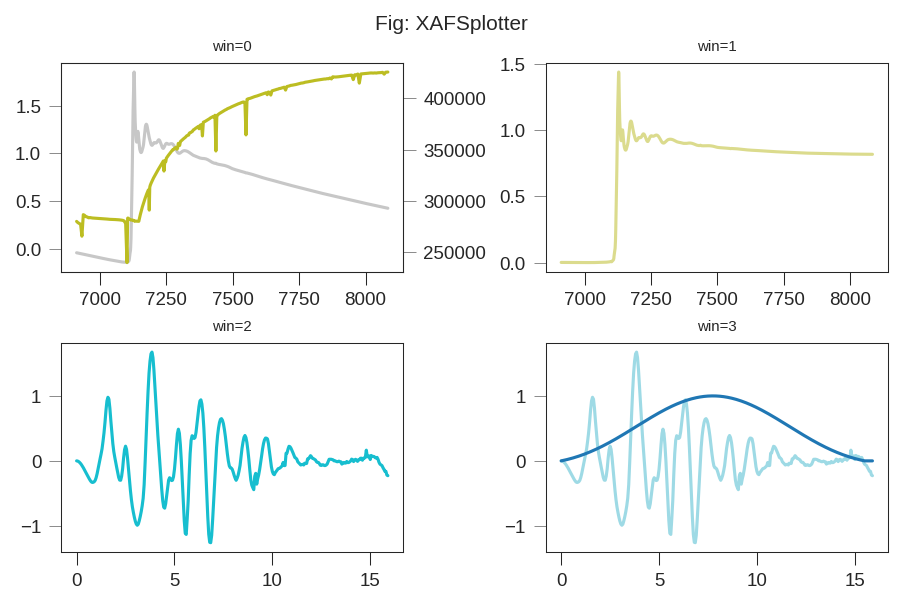

In [30]:
from sloth.utils.xafsplotter import XAFSPlotter
p = XAFSPlotter(ncols=2, nrows=2, dpi=150, figsize=(6, 4))
p.plot(feo.energy, feo.mu, label='raw', win=0)
p.plot(feo.energy, feo.i0, label='i0', win=0, side='right')
p.plot(feo.energy, feo.norm, label='norm', win=1)
p.plot(feo.k, feo.chi*feo.k**2, label='chi2', win=2)
p.plot(feo.k, feo.chi*feo.k**2, label='chi(k)', win=3)
p.plot(feo.k, feo.kwin, label='window', win=3)
p.subplots_adjust(top=0.9)

In [4]:
dir(feo)

['array_labels',
 'atsym',
 'attrs',
 'autobk_details',
 'bkg',
 'chi',
 'chie',
 'ctime',
 'data',
 'delta_bkg',
 'delta_chi',
 'dmude',
 'e0',
 'edge',
 'edge_step',
 'edge_step_area',
 'edge_step_poly',
 'energy',
 'filename',
 'flat',
 'header',
 'i0',
 'i1',
 'k',
 'mu',
 'norm',
 'norm_area',
 'norm_poly',
 'nothing',
 'path',
 'post_edge',
 'pre_edge',
 'pre_edge_details']

### Test interactive plot with wxmplot.interactive

With the following commands is possible to open an external plotting window (based on Wxpython) permitting interactive tasks.

In [5]:
from wxmplot.interactive import plot
plot(feo.energy, feo.mu, label='mu', xlabel='Energy', ylabel='mu', show_legend=True)